***STA130 HW4 - Alexander Zubchenko***

***1.***

The standard error of the mean captures the variance of each individual bootstrapped mean with the mean of the bootstrapped means. Essentially, it captures how far apart each mean is from the mean-mean. In contrast, the standard deviation of the original data only captures the variance of each data point from the mean. The main difference between the two terminology lies behind what they each compare. Fundamentally, they work the same way, but compare different data. Standard error of the mean captures the variance of a bootstrapped mean from the average mean, while standard deviation of the original data captures the variance of each data point from their mean.

***2.*** - https://chatgpt.com/share/66ff4e9e-5c30-8012-aaa6-c277ad253d8a

To determine a 95% confidence interval for our bootstrapped means, we can chop-off the lowest 2.5% of the means (those below the 2.5th percentile) and the highest 2.5% of the means (those above the 97.5th percentile). The remaining interval, from the 2.5th percentile to the 97.5th percentile, forms the 95% confidence interval. The reason for this is because the remaining interval after chopping off will include 95% of all the bootstrapped means. 

***6.*** - https://chatgpt.com/share/66ff4e9e-5c30-8012-aaa6-c277ad253d8a

***1) What is the process of bootstrapping?***

Bootstrapping is the process of re-sampling the same dataset many times, where data point are chosen independantly (Sampling with replacement), and saved for analysis. The mean/(other calculation) from each sample can then be combined into a histogram, and the means can be analyzed. In many cases, the means from each bootstrapped sample can have their own mean. Additionally, this histogram can be used to calculate the standard error of the mean.

***2) What is the main purpose of bootstrapping?***

One of the main purposes of bootstrapping is its ability to provide a way to develop confidence intervals for our statistics. By re-sampling the same data many times, over and over, we can generate a wide array of bootstrapped calculations which can be compared with eachother. From our comparison, we can create an interval, such as 95%, to determine where the mean likely is. 

Additionally, Bootstrapping allows statisticians to save lots of time and money from sampling data. Normally, data must be gathered one by one so it can be compared. However, because bootstrapping allows us to re-sample the same data over and over, we can avoid the hassle of gathering new data.

***3) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?***

We can use bootstrapping to determine a confidence interval from our sample n, and compare it with our hypothesis to test for plausibility. First, we independently pick data points from our sample of size n and add them to a new bootstrapped dataset. We go ahead and calculate the mean of this new dataset and add it into our histogram of means. We then repeat this process a large number of times to ensure higher accuracy and add many values into our histogram of means. Once done, we can find the average mean from our histogram of means, and compare it with our hypothesized guess about the average of a population. Additionally, we can deduce a confidence interval (Ex. 95%) for our histogram of means, and check whether our hypothesized guess exists within the interval. 

With this method, we can determine the likelihood of our guess being close to the actual average of a population.

***8.*** https://chatgpt.com/share/66ff60af-5430-8012-ab49-b4dd5e5598c3

***Problem Introduction***

My first approach was to simply visualize the actual data from this health CSV file before I approach with bootstrapping. Because I am attempting to determine the effectiveness of the drug on improving patient health, I visualized a histogram of health improvement (final_health - initial_health). This way, we can understand the frequency of each degree of improvement in our data.

For the purpose of finding if the drug is effective, we can mostly disregard all the other data in the CSV which doesn't relate to patient health. However, it is important to note that we can also repeat this process, only considering patients of certain Sex (M/F), or Age, to determine the effectiveness of the drug in relation to one of the other measured statistics. Because of low sample size, we will only measure the overall effectiveness of the drugl.

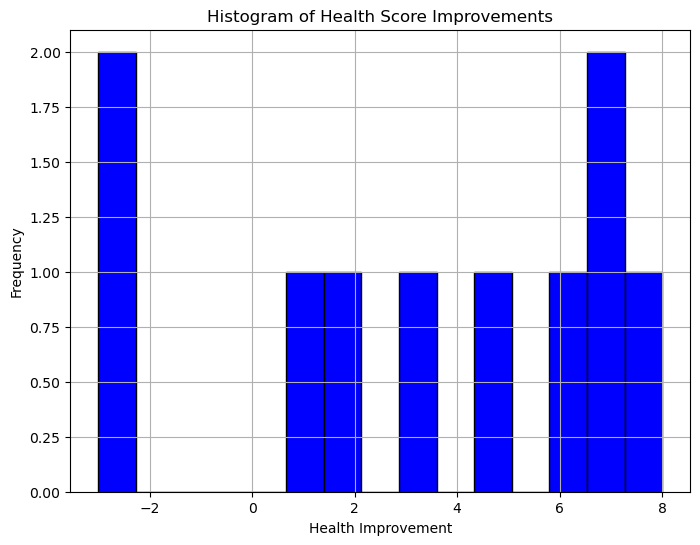

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file from the given URL
url = "https://raw.githubusercontent.com/Aoutor/health_data_csv/refs/heads/main/patient_health_data.csv"
data = pd.read_csv(url)

# Assuming the CSV contains columns 'initial_health_score' and 'final_health_score'
# Calculate the improvement: improvement = final_health_score - initial_health_score
data['health_improvement'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Plot a histogram of health improvements
plt.figure(figsize=(8, 6))
plt.hist(data['health_improvement'], bins=15, color='blue', edgecolor='black')
plt.title('Histogram of Health Score Improvements')
plt.xlabel('Health Improvement')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



Explanation of Null-Hypothesis: https://chatgpt.com/share/66ff60af-5430-8012-ab49-b4dd5e5598c3
        
In this context, the Null Hypothesis of "no effect" posits that the drug administered to the patients has no impact on their health scores. Specifically, it assumes that any observed changes or improvements in health outcomes are attributable to random variation rather than the influence of the drug itself. Testing this hypothesis involves analyzing the data to determine whether there is sufficient evidence to reject the Null Hypothesis and conclude that the drug does, in fact, have a significant effect on patient health.

***Quantitative Analysis***

**Bootstrapping Process***

- The code loads the patient health data and calculates the health improvements.

- It performs the bootstrap sampling for a specified number of iterations (e.g., 1000). In each iteration:
    - It randomly samples the health improvement data with replacement.
    - It computes the mean of the sampled data and stores it.
    
Results: Finally, it calculates the overall bootstrap mean and the 95% confidence intervals, which can be useful for understanding the variability of the mean estimate.

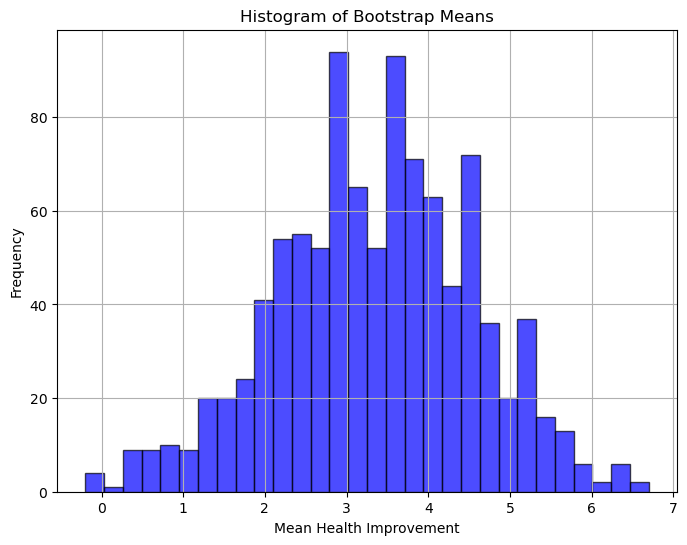

Bootstrap Mean: 3.3457000000000003
95% Confidence Interval: [0.8, 5.6]


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file from the given URL
url = "https://raw.githubusercontent.com/Aoutor/health_data_csv/refs/heads/main/patient_health_data.csv"
data = pd.read_csv(url)

# Calculate health improvements
data['health_improvement'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Set the number of bootstrap iterations
n_iterations = 1000
bootstrap_means = []

# Set a random seed for reproducibility
np.random.seed(41)  # You can choose any integer value

# Bootstrap process
for _ in range(n_iterations):
    # Randomly sample with replacement from the health improvement data
    sample = np.random.choice(data['health_improvement'], size=len(data), replace=True)
    # Calculate the mean of the sampled data
    bootstrap_means.append(np.mean(sample))

# Convert the list of bootstrap means to a numpy array for further analysis
bootstrap_means = np.array(bootstrap_means)

# Plot a histogram of the bootstrap means
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrap Means')
plt.xlabel('Mean Health Improvement')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Optionally, calculate the mean and confidence intervals of the bootstrap means
mean_bootstrap = np.mean(bootstrap_means)
lower_ci = np.percentile(bootstrap_means, 2.5)
upper_ci = np.percentile(bootstrap_means, 97.5)

print(f"Bootstrap Mean: {mean_bootstrap}")
print(f"95% Confidence Interval: [{lower_ci}, {upper_ci}]")


***Explanation of the Histogram:***

- After calculating the bootstrap means, the code creates a histogram to visualize their distribution.

- The histogram shows how frequently different mean health improvements occur across the bootstrap samples, providing insight into the variability of the estimated means.

***Findings and Discussion:***

Based on the results of the bootstrap analysis, the estimated Bootstrap Mean health improvement after the administration of the drug is approximately **3.32**. This indicates that, on average, patients experienced a positive change in their health scores following treatment. The 95% Confidence Interval ranges from **0.8** to **5.6**, suggesting that we can be 95% confident that the true mean health improvement lies within this interval. 

These findings support the hypothesis that the drug has a significant effect on improving patient health. The lower bound of the confidence interval being greater than zero further reinforces this conclusion, indicating that it is unlikely that the drug has no effect at all. Overall, the analysis suggests that the drug is effective in enhancing health outcomes for the patients in this study, providing valuable insights for further research and potential clinical applications.